# Visualisation des données

In [26]:
import os

import pandas as pd

In [27]:
#Répertoire du fichier de données
PROCESSED_DIR = '../data/processed/'

# Table principale 
ALL_DATA_FILE =  'all_data.csv'

In [28]:
epidemie_df = (pd.read_csv(os.path.join(PROCESSED_DIR, ALL_DATA_FILE), parse_dates=["Last Update"])
               .assign(day=lambda _df: _df['Last Update'].dt.date)
              )

In [29]:
epidemie_df.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,source,day
0,Anhui,Mainland China,2020-01-22 17:00:00,1.0,NaN,NaN,31.8257,117.2264,01-22-2020.csv,2020-01-22
1,Beijing,Mainland China,2020-01-22 17:00:00,14.0,NaN,NaN,40.1824,116.4142,01-22-2020.csv,2020-01-22
2,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,NaN,NaN,30.0572,107.8740,01-22-2020.csv,2020-01-22
3,Fujian,Mainland China,2020-01-22 17:00:00,1.0,NaN,NaN,26.0789,117.9874,01-22-2020.csv,2020-01-22
4,Gansu,Mainland China,2020-01-22 17:00:00,NaN,NaN,NaN,36.0611,103.8343,01-22-2020.csv,2020-01-22


In [30]:
epidemie_df.dtypes

Province/State            object
Country/Region            object
Last Update       datetime64[ns]
Confirmed                float64
Deaths                   float64
Recovered                float64
Latitude                 float64
Longitude                float64
source                    object
day                       object
dtype: object

In [31]:
epidemie_df['Country/Region'].value_counts()

Mainland China            1358
US                         535
Australia                  177
Canada                     116
Japan                       44
                          ... 
North Ireland                1
Colombia                     1
Slovenia                     1
Bosnia and Herzegovina       1
Palestine                    1
Name: Country/Region, Length: 94, dtype: int64

## Visualiser la progression de l'épidémie en France

In [32]:
# conda activate corona
# conda install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Activer les paramètres par défauts de seaborn
sns.set()

In [33]:
%matplotlib inline

In [34]:
epidemie_df[epidemie_df['Country/Region'] == 'France'].head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,source,day
124,NaN,France,2020-01-24 17:00:00,2.0,NaN,NaN,47.0,2.0,01-24-2020.csv,2020-01-24
165,NaN,France,2020-01-25 17:00:00,3.0,NaN,NaN,47.0,2.0,01-25-2020.csv,2020-01-25
211,NaN,France,2020-01-26 16:00:00,3.0,NaN,NaN,47.0,2.0,01-26-2020.csv,2020-01-26
258,NaN,France,2020-01-27 23:59:00,3.0,NaN,NaN,47.0,2.0,01-27-2020.csv,2020-01-27
309,NaN,France,2020-01-28 23:00:00,4.0,NaN,NaN,47.0,2.0,01-28-2020.csv,2020-01-28


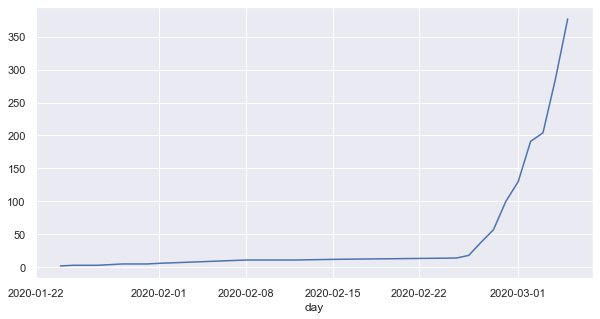

In [35]:
epidemie_df[epidemie_df['Country/Region'] == 'France'].set_index('day')['Confirmed'].plot(figsize=(10, 5));

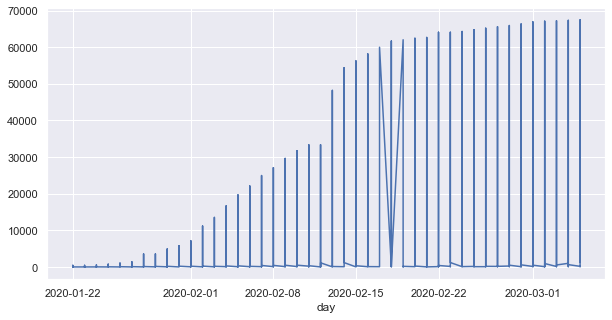

In [36]:
epidemie_df[epidemie_df['Country/Region'] == 'Mainland China'].set_index('day')['Confirmed'].plot(figsize=(10, 5));

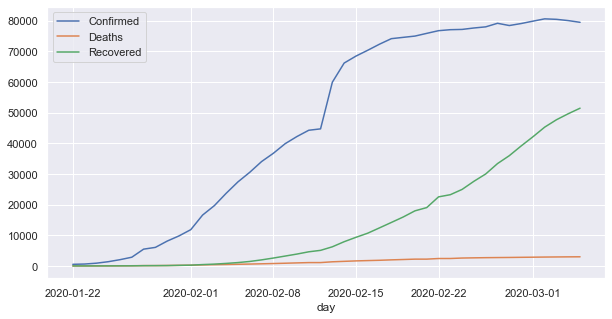

In [37]:
(epidemie_df[epidemie_df['Country/Region'] == 'Mainland China']
 .fillna(value=0)
 .groupby("day")
 .agg({'Confirmed':"sum", "Deaths":"sum", 'Recovered':"sum"})
).plot(figsize=(10,5));

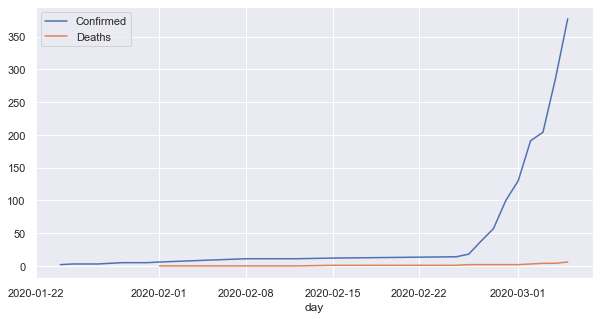

In [38]:
(epidemie_df[epidemie_df['Country/Region'] == 'France']
 .set_index('day')[['Confirmed','Deaths']]
).plot(figsize=(10, 5));

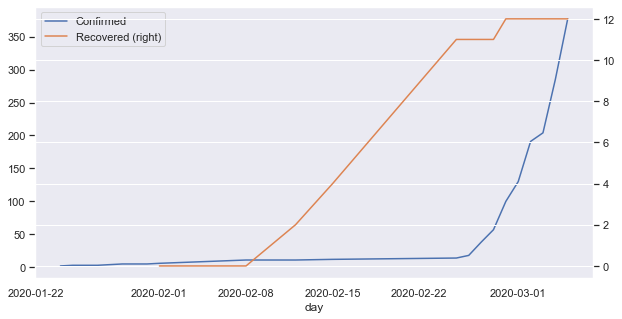

In [39]:
# Ajouter un axe différent pour les décès
(epidemie_df[epidemie_df['Country/Region'] == 'France']
 .set_index('day')[['Confirmed','Recovered']]
).plot(secondary_y=['Deaths', 'Recovered'], figsize=(10, 5));

In [40]:
china_df = (epidemie_df[epidemie_df['Country/Region'] == 'Mainland China']
            .groupby('day')
            .agg({'Confirmed':'sum', 'Deaths':'sum', 'Recovered':'sum'})
           )

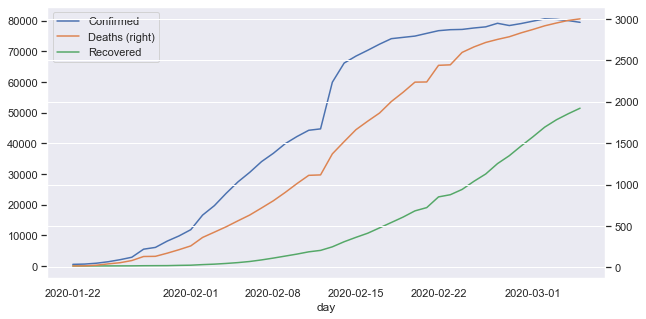

In [41]:
china_df.plot(secondary_y=['Deaths'], figsize=(10,5));

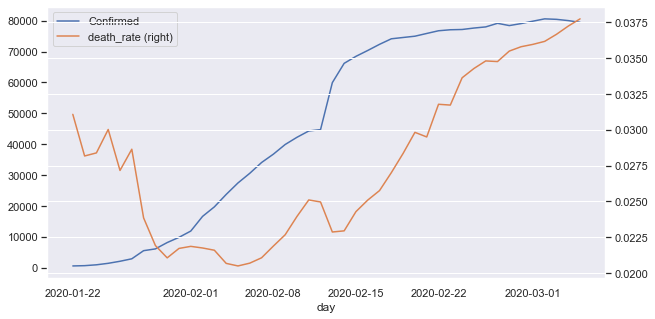

In [42]:
(china_df
 .assign(death_rate=lambda _df: _df['Deaths']/_df['Confirmed'])[['Confirmed', 'death_rate']]
 .plot(secondary_y=['death_rate'], figsize=(10,5))
);

### Graphiques interactifs 
- Bokeh (graphiques + UI)
- Dash + plotly
- Attair

--> On utilise pyplot

In [43]:
EUROPE = ['France', 'Spain', 'Italy', 'Germany', 'UK']

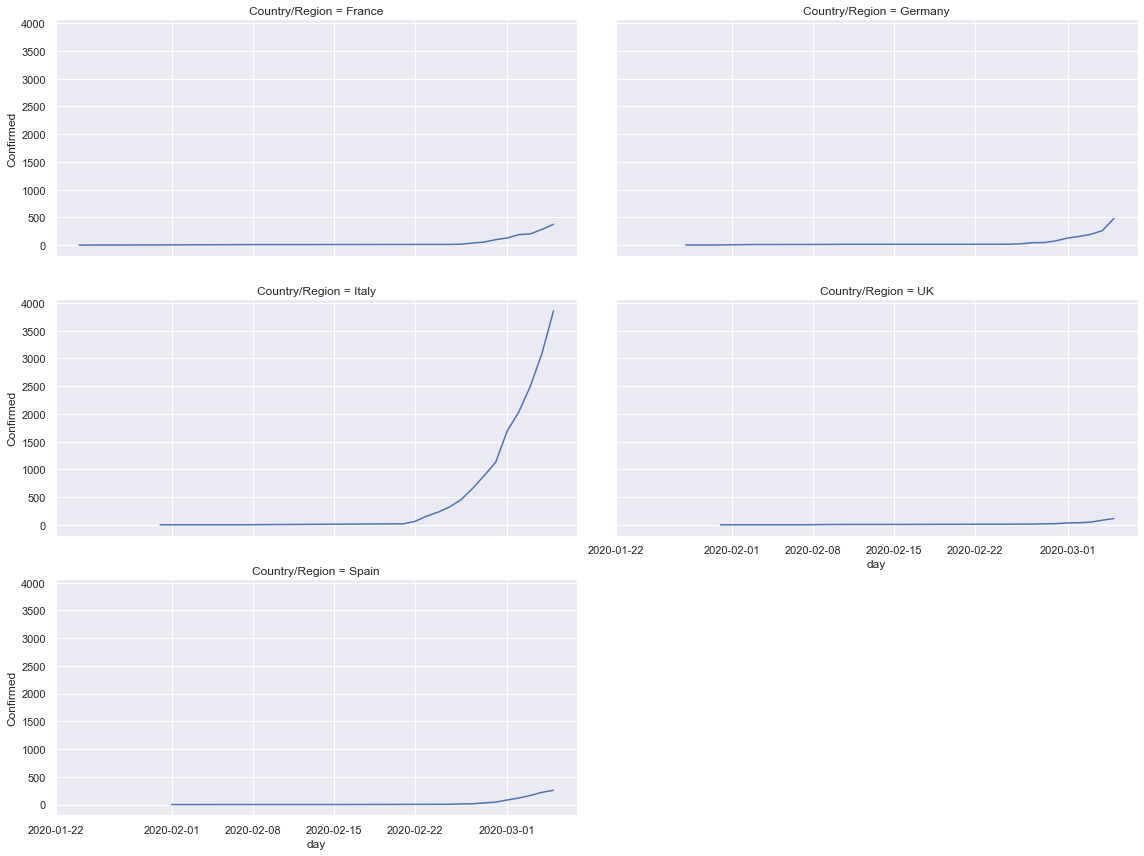

In [44]:
g = sns.FacetGrid(epidemie_df[epidemie_df['Country/Region'].isin(EUROPE)],
                 col='Country/Region', col_wrap=2, height=4, aspect=2)
g = g.map(plt.plot, 'day', 'Confirmed')

In [45]:
# conda install plotly
# conda install dash
# conda install -c plotly chart-studio
# conda install nbformat

# import chart_studio.plotly as py

import plotly.graph_objs as go

from plotly.offline import init_notebook_mode, plot, iplot # pas besoin de se connecter au site de plotly pour fonctionner

import nbformat

In [46]:
france_df = epidemie_df[epidemie_df["Country/Region"] == 'France']

In [65]:
data = [go.Scatter(x=france_df.day, 
                   y=france_df.Confirmed,
                   name='Confirmés/France'),
       go.Scatter(x=epidemie_df[epidemie_df["Country/Region"] == 'Germany']['day'],
                  y=epidemie_df[epidemie_df["Country/Region"] == 'Germany']['Confirmed'],
                  name='Confirmés/Allemagne'
                 )]

layout = dict(
    title = 'Épidémie Corona Virus en France',
    xaxis = dict(range = ['2020-01-22', '2020-03-05'])
)

fig = dict(data=data, layout=layout)

iplot(fig)

#### Maquette du tableau de bord

- Graphique temporel de l'évolution du nombre de cas Confirmés/Morts/Guéris avec deux axes Y. Avec une boite de dialogue avec des checkboxes C|D|R, une liste avec les pays (en selectionner autant qu'on veux : SelectMultiple)

- 2 onglets : le deuxieme nommé "Géographie" et une représentation carthographique de type gapminder

1 - Refléchir à une visualisation avec de nouvelles variables

2 - Peut on trouver l'info du nombre de voyageurs à arriver dans un pays et/ou population ?

3 - Regarder modèles existants sur la propagation d'épidémie (en série chronologique) ?